# <p style="background-color:orange;font-family:verdana;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>By SAHAN</b></p>

# <p style="background-color:orange;font-family:verdana;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression Balanced Data Set</b></p>

# Exploratory Data Analysis

**Dataset Overview**

The dataset appears to be related to a hearing test and contains the following features:

1. **age**: This column represents the age of the individual taking the hearing test. This feature can be used to analyze the correlation between age and hearing ability.
2. **physical_score**: This column represents a score related to the physical condition of the individual. The exact nature of this score is not specified, but it likely quantifies some aspect of physical fitness or health.
3. **test_result**: This column indicates the result of the hearing test. The value **1** likely denotes a positive result (e.g., passed the test or has normal hearing), while **0** indicates a negative result (e.g., failed the test or has hearing issues). This is the target variable for classification problems.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("hearing_test.csv")

In [3]:
df.head()

age  physical_score  test_result
0 33.000          40.700            1
1 50.000          37.200            1
2 52.000          24.700            0
3 56.000          31.000            0
4 35.000          42.900            1

In [4]:
df.sample(5)

age  physical_score  test_result
1063 38.000          42.000            1
2617 60.000          34.500            0
4477 52.000          43.700            0
3117 53.000          23.500            0
4805 37.000          44.100            1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe().T

count   mean    std    min    25%    50%    75%    max
age            5000.000 51.609 11.287 18.000 43.000 51.000 60.000 90.000
physical_score 5000.000 32.760  8.170 -0.000 26.700 35.300 38.900 50.000
test_result    5000.000  0.600  0.490  0.000  0.000  1.000  1.000  1.000

In [7]:
df["test_result"].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

In [8]:
df["test_result"]

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

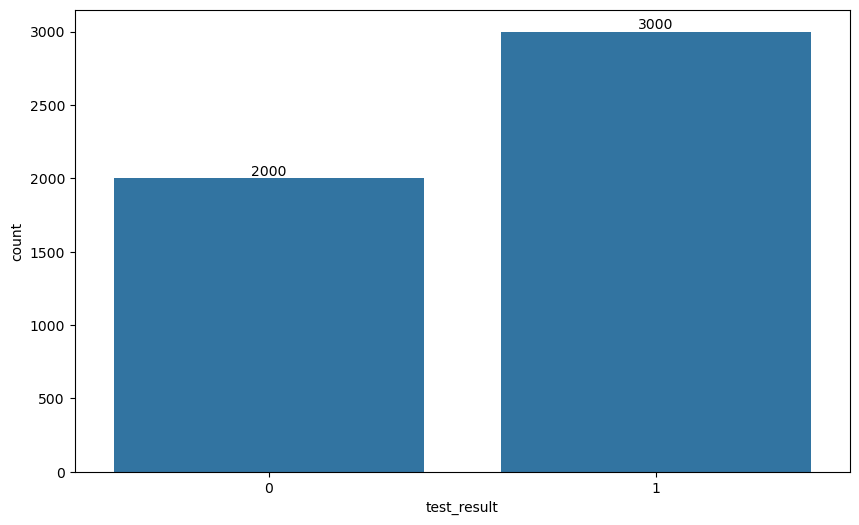

In [9]:
ax = sns.countplot(x='test_result', data=df)
ax.bar_label(ax.containers[0])
plt.show()

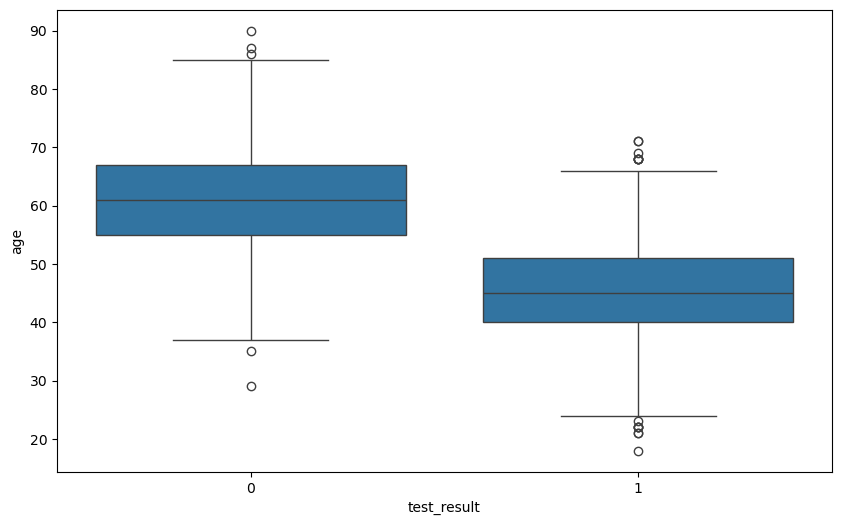

In [10]:
sns.boxplot(x="test_result", y="age", data=df)
plt.show()

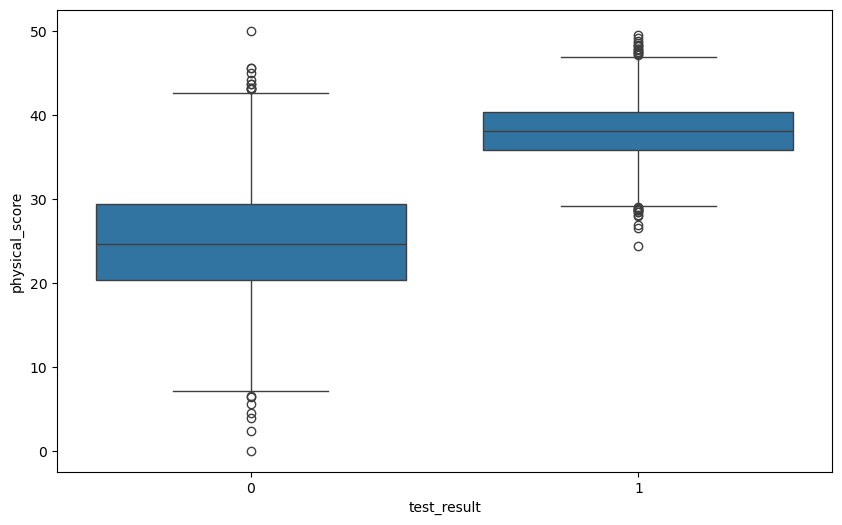

In [11]:
sns.boxplot(x="test_result", y="physical_score", data=df)
plt.show()

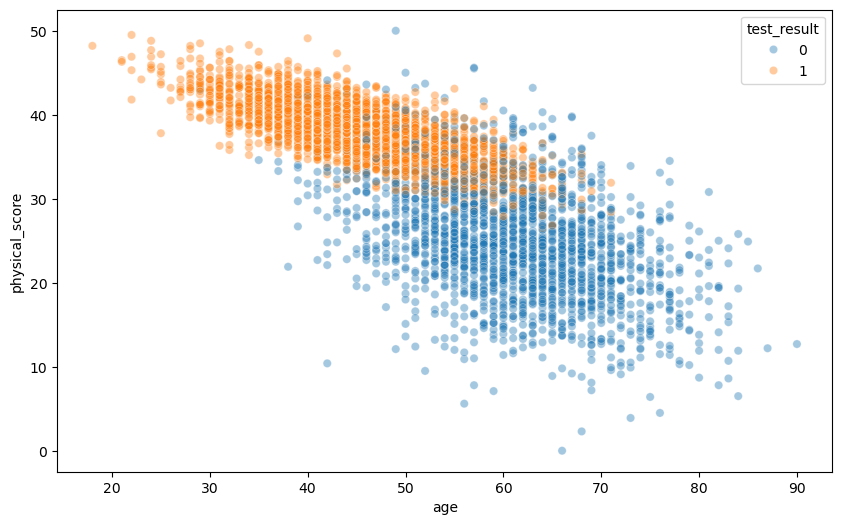

In [12]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.4)
plt.show()

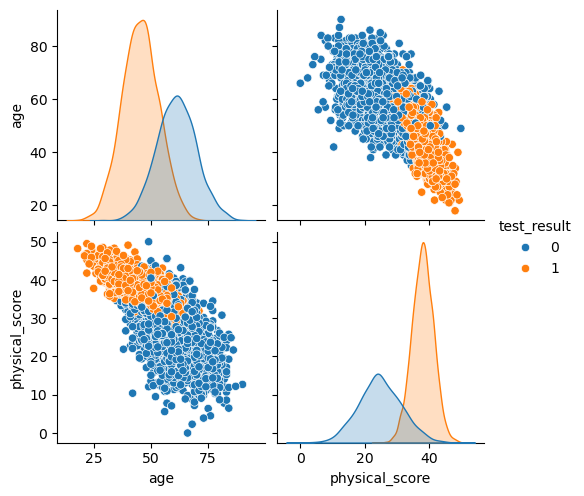

In [13]:
sns.pairplot(df, hue= "test_result")
plt.show()

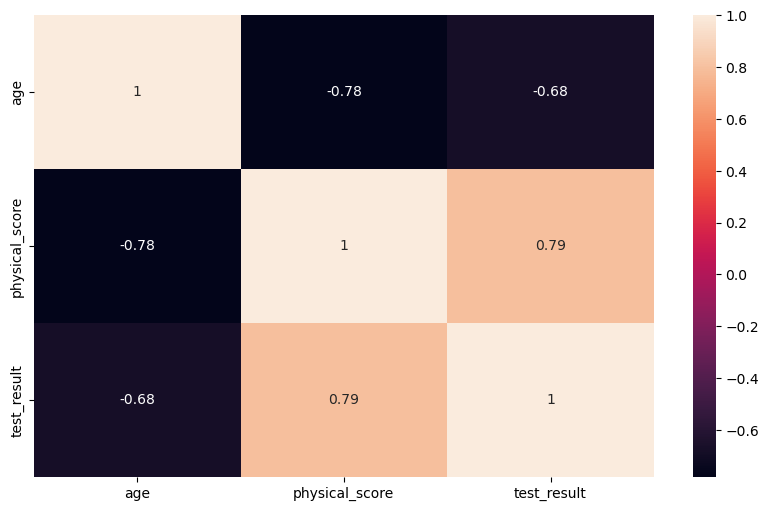

In [14]:
sns.heatmap(df.corr(), annot=True)
plt.show()

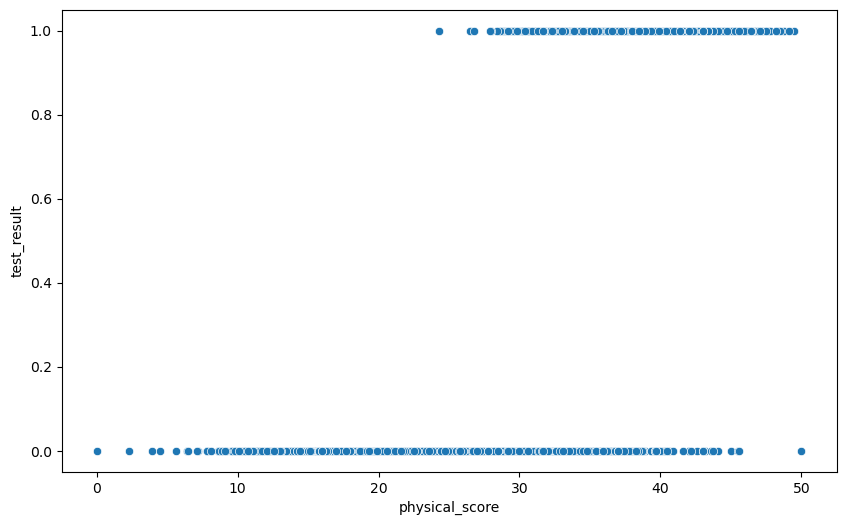

In [15]:
sns.scatterplot(x='physical_score', y='test_result', data=df)
plt.show()

# Modelling for Logistic Regression

## Train | Test Split

In [16]:
X= df.drop("test_result", axis=1)
y= df["test_result"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=101)

## Modeling without Scaling Data

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [21]:
log_model =LogisticRegression()

In [22]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
log_model.coef_

array([[-0.0790601 ,  0.43759344]])

In [24]:
b2, b1 = log_model.coef_[0]
print("b2 (age coef)       :", b2)
print("b1 (physical_score) :", b1)

b2 (age coef)       : -0.07906009922208991
b1 (physical_score) : 0.43759344103683206


## Modeling with Scaling Data

**PIPELINE**

What happens can be described as follows:

Step 1: The data are split into TRAINING data and TEST data according to ratio of train_test_split

Step 2: the scaler is fitted on the numeric features of TRAINING data
    
Step 3: the scaler transforms the numeric features of TRAINING data

Step 4: the models are fitted/trained using the transformed TRAINING data

Step 5: the scaler transforms the numeric features of TEST data according to TRAINING data

Step 6: the trained models predict using the transformed TEST data



pipe_model.fit(X_train, y_train) --> scaler.fit(X_train)     
                                 --> scaler.transform(X_train)
                                 --> lojistic.fit(X_train_scaled, y_train)

pipe_model.predict(X_test)       --> scaler.transform(X_test) 
                                 --> lojistic.predict(X_test_scaled)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
operations= [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

In [27]:
pipe_model = Pipeline(steps= operations)

In [28]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [29]:
pipe_model["logistic"].coef_

array([[-0.9039212 ,  3.48681952]])

In [ ]:
log_model.coef_  

# coefficients without scaling

array([[-0.0790601 ,  0.43759344]])

In [31]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

# predict_proba indicates the probability with which observations in the test data are assigned to which class. 
# The first value indicates the probability of belonging to class 0, while the second value indicates the probability of belonging to class 1. 
# Whichever value is larger is assigned to that class. 

array([[0.02436668, 0.97563332],
       [0.02672574, 0.97327426],
       [0.9893468 , 0.0106532 ],
       ...,
       [0.02396838, 0.97603162],
       [0.94905149, 0.05094851],
       [0.22356825, 0.77643175]])

In [33]:
y_pred_proba_rounded = np.round(y_pred_proba, 2)
y_pred_proba_rounded

array([[0.02, 0.98],
       [0.03, 0.97],
       [0.99, 0.01],
       ...,
       [0.02, 0.98],
       [0.95, 0.05],
       [0.22, 0.78]])

In [34]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

age  physical_score  test_result
1718 39.000          37.800            1
2511 45.000          38.700            1
345  56.000          21.800            0
2521 40.000          44.000            1
54   64.000          25.400            0
...     ...             ...          ...
3900 71.000          23.300            0
3753 51.000          32.600            1
3582 42.000          38.400            1
2392 52.000          24.800            0
3343 54.000          34.900            1

[1000 rows x 3 columns]

In [ ]:
test_data["pred_proba"] = y_pred_proba_rounded[:, 1]
test_data

# And in the test_data df we add the pred_proba column/feature that shows the probability of belonging to class 1.

age  physical_score  test_result  pred_proba
1718 39.000          37.800            1       0.980
2511 45.000          38.700            1       0.970
345  56.000          21.800            0       0.010
2521 40.000          44.000            1       1.000
54   64.000          25.400            0       0.030
...     ...             ...          ...         ...
3900 71.000          23.300            0       0.010
3753 51.000          32.600            1       0.620
3582 42.000          38.400            1       0.980
2392 52.000          24.800            0       0.050
3343 54.000          34.900            1       0.780

[1000 rows x 4 columns]

In [ ]:
test_data["pred"] = y_pred
test_data

# whatever the target class is, it is always made 1
# test_result matches pred_proba (prediction probability value) and pred values

# While the model predicts, probabilities greater than 0.5 and 0.5 are assigned to class 1, probabilities less than 0.5 are assigned to class 1. 
#ise assigns to 0 class. We add the predictions made by the model to the test_data df as pred feature.

age  physical_score  test_result  pred_proba  pred
1718 39.000          37.800            1       0.980     1
2511 45.000          38.700            1       0.970     1
345  56.000          21.800            0       0.010     0
2521 40.000          44.000            1       1.000     1
54   64.000          25.400            0       0.030     0
...     ...             ...          ...         ...   ...
3900 71.000          23.300            0       0.010     0
3753 51.000          32.600            1       0.620     1
3582 42.000          38.400            1       0.980     1
2392 52.000          24.800            0       0.050     0
3343 54.000          34.900            1       0.780     1

[1000 rows x 5 columns]

In [ ]:
test_data.sample(10)

# samples are taken from the test data and checked. Reasons if there is an error. 
# There may be errors in values close to 0.5, test_result may be 0 but pred may be 1.
# pred_proba values are desired to be high in models.

age  physical_score  test_result  pred_proba  pred
3835 77.000          12.100            0       0.000     0
4273 58.000          33.900            0       0.620     1
3208 48.000          24.700            0       0.070     0
2808 28.000          44.300            1       1.000     1
626  29.000          44.500            1       1.000     1
2312 47.000          35.800            1       0.900     1
1763 47.000          34.300            1       0.820     1
3674 42.000          38.700            1       0.980     1
4752 43.000          37.400            1       0.960     1
4857 41.000          38.700            1       0.980     1

In [ ]:
# I want to bring all the wrong predictions made.

test_data[((test_data["test_result"]==1) & (test_data["pred"]==0)) | ((test_data["test_result"]==0) & (test_data["pred"]==1)) ]

# test_data[test_data.test_result != test_data.pred]

age  physical_score  test_result  pred_proba  pred
2371 46.000          36.400            0       0.930     1
618  63.000          33.400            1       0.470     0
2145 65.000          35.200            0       0.620     1
3200 60.000          32.900            1       0.480     0
1726 46.000          36.700            0       0.930     1
...     ...             ...          ...         ...   ...
2420 60.000          32.500            1       0.430     0
3917 48.000          33.400            0       0.750     1
2452 61.000          33.600            0       0.530     1
1845 50.000          31.900            0       0.570     1
4273 58.000          33.900            0       0.620     1

[83 rows x 5 columns]

In [ ]:
df.loc[2371] 
# Observation that he said 1 with a probability of 0.930 but was wrong

age              46.000
physical_score   36.400
test_result       0.000
Name: 2371, dtype: float64

# Model Performance on Classification Tasks

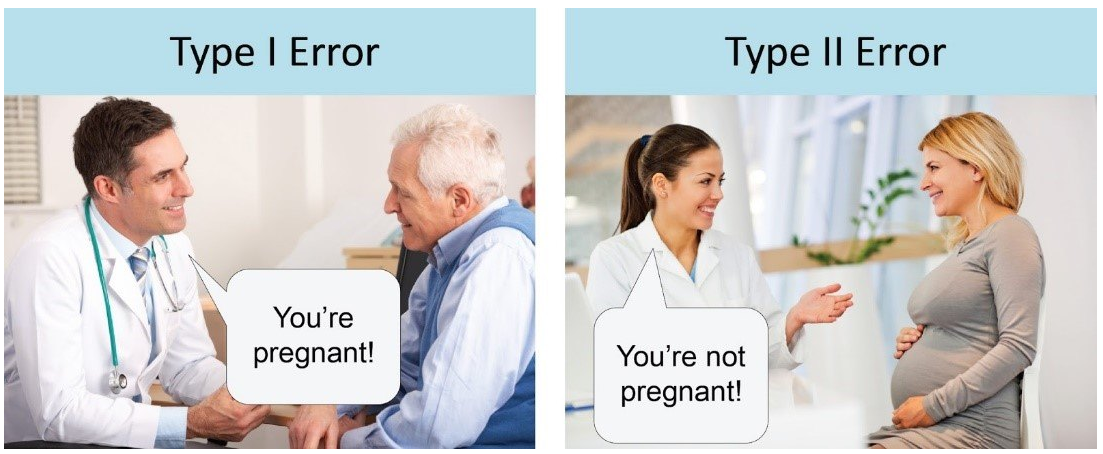

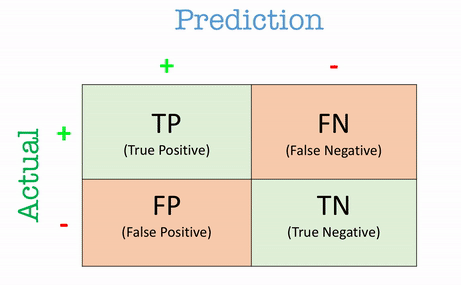

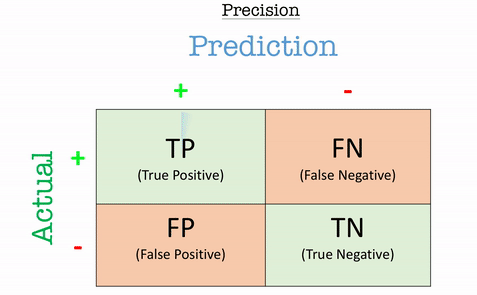

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# We import the libraries necessary to calculate performance metrics
# accuracy_score: Calculates the accuracy of the model
# precision_score: Calculates the ratio of correct positive predictions to total positive predictions
# recall_score: Calculates the ratio of true positive predictions to total true positives
# f1_score: Calculates the harmonic mean of Precision and Recall
# log_loss: Calculates the loss of accuracy of the model over the probabilities of the predictions

In [ ]:
accuracy_score(y_test, y_pred)

# Calculates the accuracy of the model. The accuracy ratio is the ratio of the model's correct predictions to all predictions.
# y_test: Actual class labels
# y_pred: Class labels predicted by the model

0.917

In [ ]:
pipe_model.score(X_test, y_test)

# When we give x_test, y_test into the score function, it returns the accuracy score.

# pipe_model takes x and y tests into pipe_model. returns the same values as accuracy_score. 

0.917

In [ ]:
precision_score(y_test, y_pred, pos_label=1)   # default = pos_label=1

# pos_label=1: Label of the positive class
# by default returns the precision_score of clade 1. 
# indicates how many of the predictions made to correctly predict clade 1 were accurate. 
# precision 0.1 means that the model hit 10% of its predictions.

# If I want to do a search for the score of clade 0, pos_label should be set to=0.

0.9126365054602185

In [ ]:
precision_score(y_test, y_pred, pos_label=0)

# If I want to do a search for the score of clade 0, pos_label should be set to=0.

0.924791086350975

In [ ]:
recall_score(y_test, y_pred, pos_label=1)

# pos_label=1: Label of the positive class
# returns the recall_score of class 1 by default.
# indicates how many of the predictions made to correctly predict class 1 were accurate.
# recall 0.1 means that the model correctly predicted 10% of the true positives of the positive class.
# For the score of the negative class, pos_label should be set to=0.

0.9558823529411765

In [46]:
recall_score(y_test, y_pred, pos_label=0)

0.8556701030927835

In [47]:
f1_score(y_test, y_pred, pos_label=1) 

0.9337589784517158

In [48]:
f1_score(y_test, y_pred, pos_label=0) 

0.8888888888888888

In [50]:
# accuracy_score(y_test, y_pred, pos_label=0)   # gives an error

In [ ]:
log_loss(y_test, y_pred)

# log_loss measures how much the model's predicted probabilities deviate from the true classes.
# The lower the log_loss value, the higher the accuracy of the model's predictions.
# A high log_loss value indicates that the model's predictions are too far from the true classes.

2.991623231296724

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay   

# We import the libraries required for performance evaluation
# confusion_matrix: Constructs the confusion matrix between actual and predicted classes to evaluate the performance of the model
# classification_report: Generates a summary report of classification metrics such as precision, recall, f1-score
# ConfusionMatrixDisplay: Used to visualise the confusion matrix

In [ ]:
confusion_matrix(y_test, y_pred)

# The confusion matrix contains the values of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).
# Each cell of the matrix allows a detailed analysis of the performance of the model.

array([[332,  56],
       [ 27, 585]], dtype=int64)

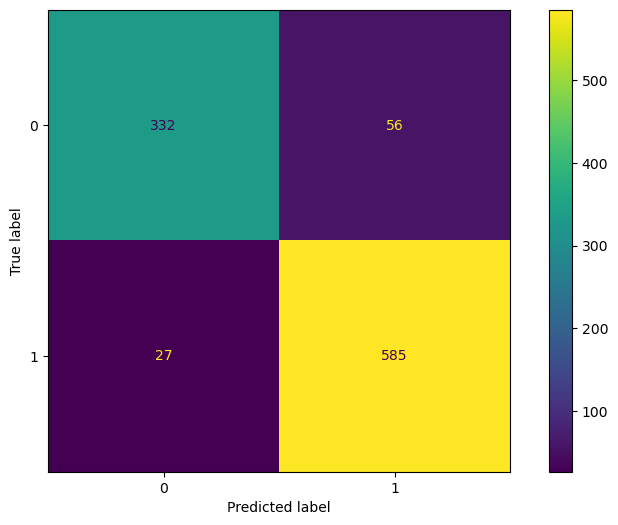

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)
plt.show()

# ConfusionMatrixDisplay is used to visualise the confusion matrix.
# from_estimator: Generates and visualises the confusion matrix based on the model's predictions.
# pipe_model: Model from which predictions are made

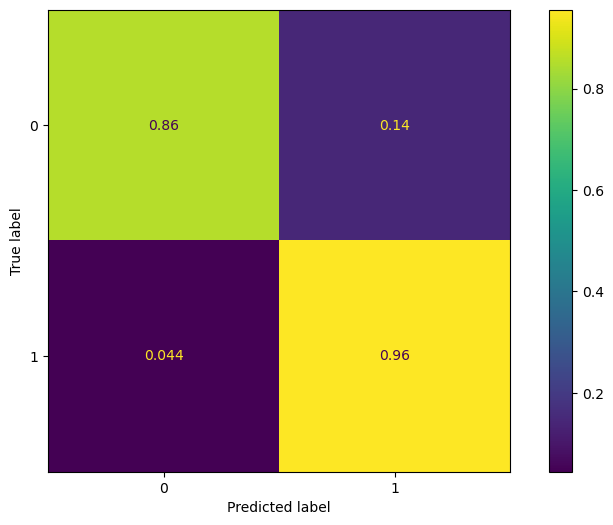

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, normalize='true')
plt.show()

# normalise=‘true’: Normalises the confusion matrix.
# The value in each cell is divided by the total number of instances for the actual class, shown as a ratio.
# each row is normalised to its own sum.

# I got 86% of the 0's right.
# I got 96% of the 1's right.

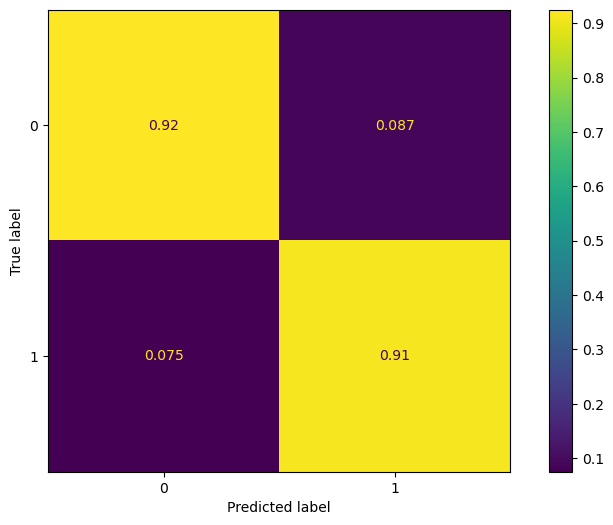

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, normalize='pred')
plt.show()

# normalise=‘pred’: Normalises the confusion matrix, the value in each cell is divided by the total number of samples for the predicted class, shown as a proportion.
# I knew 92 per cent of what I predicted as 0.
# I knew 91 per cent of what I predicted.
# each column is normalised to its own sum.

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
# We define our eval_metric function to observe both train and test set scores.

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# Speaking for label 1. 
# precision 0.91 means that 91% of my predictions are correct.
# recall 0.96 means that I correctly detected 96% of the classes that were actually 1.
# f1 score gives the harmonic average of precision and recall scores, so it is based on your target metric (recall, precision). 
# must be interpreted. Interpreting it alone will cause misinterpretation.

# Whether there is overfiting in the data is decided by comparing the test and train scores of the target class. Train set
# If their scores are much better than the test data, if there is a gap between them, there is overfiting.
# However, we do not make an overfiting/underfiting decision by looking at the train and test data in the overall data. Definite overfiting / 
# We will make the underfiting decision after cross_validation.

Test_Set
[[332  56]
 [ 27 585]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       388
           1       0.91      0.96      0.93       612

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000


Train_Set
[[1401  211]
 [ 128 2260]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1612
           1       0.91      0.95      0.93      2388

    accuracy                           0.92      4000
   macro avg       0.92      0.91      0.91      4000
weighted avg       0.92      0.92      0.91      4000



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.metrics import get_scorer_names

scorers_list = get_scorer_names()
print(scorers_list)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'r

In [ ]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

# both train and validation in each iteration in order to make a precise overfitting/underfitting decision over cross_validation
# We set return_train_score=True to be able to compare set scores.

# If we have applied scaling to our data, we need to use pipeline in CV and grid search operations to prevent data leakage.

# The scores returned below are always scores belonging to class 1. For CV scores of metrics belonging to class 0, we need to perform additional operations.

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1      0.077       0.068          0.920           0.915           0.912   
2      0.019       0.035          0.930           0.914           0.907   
3      0.036       0.044          0.948           0.912           0.943   
4      0.022       0.025          0.938           0.913           0.946   
5      0.020       0.021          0.900           0.917           0.923   
6      0.015       0.021          0.905           0.916           0.914   
7      0.052       0.029          0.902           0.917           0.891   
8      0.022       0.021          0.900           0.917           0.903   
9      0.013       0.031          0.902           0.917           0.903   
10     0.017       0.016          0.907           0.917           0.901   

    train_precision  test_recall  train_recall  test_f1  train_f1  
1             0.914        0.958         0.946    0.934     0.930  
2             0.915        0.983         0.943    0.944     0.929  
3             0.911        0.971         0.944    0.957     0.927  
4             0.912        0.950         0.946    0.948     0.929  
5             0.917        0.908         0.947    0.916     0.932  
6             0.915        0.929         0.948    0.921     0.931  
7             0.918        0.954         0.946    0.921     0.932  
8             0.915        0.933         0.949    0.918     0.932  
9             0.916        0.937         0.947    0.920     0.931  
10            0.916        0.950         0.948    0.925     0.932

In [ ]:
df_scores.mean()[2:]

test_accuracy     0.915
train_accuracy    0.916
test_precision    0.914
train_precision   0.915
test_recall       0.947
train_recall      0.947
test_f1           0.930
train_f1          0.930
dtype: float64

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

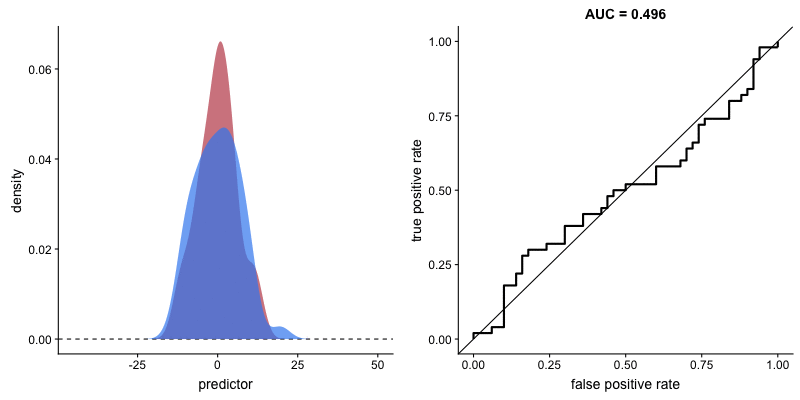

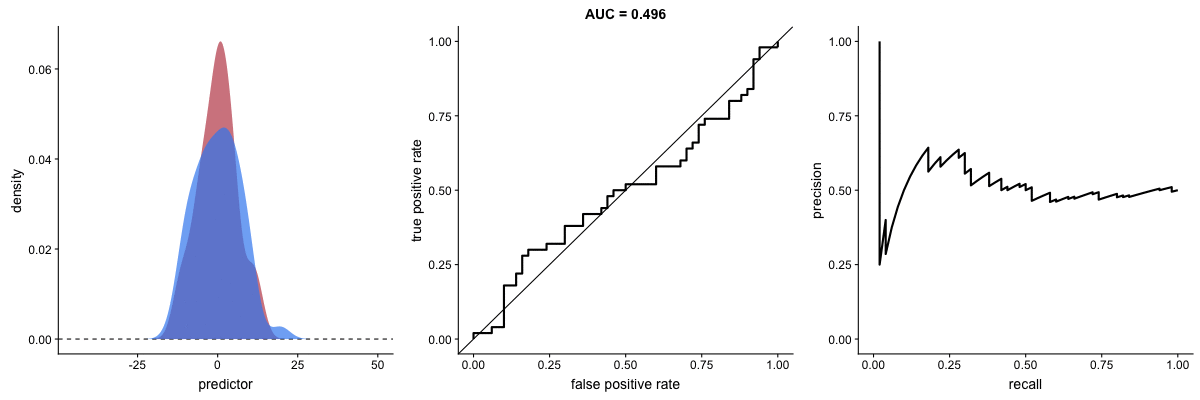

# Final Model and Model Deployment

In [51]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score

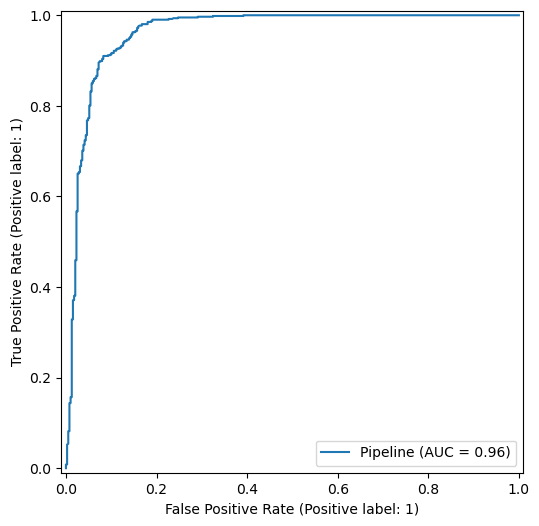

In [52]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test)
plt.show()

In [53]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9625151607034568

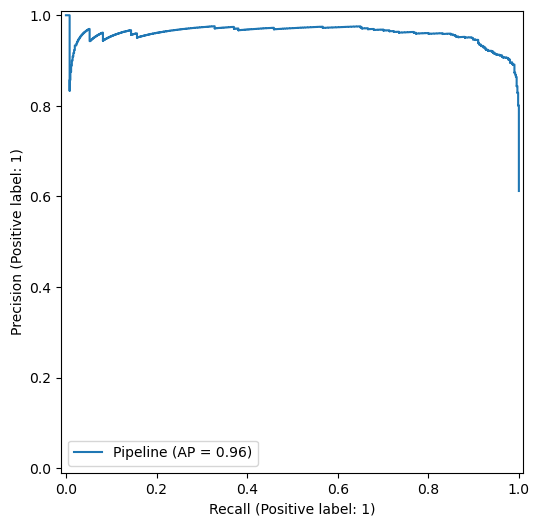

In [55]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test)
plt.show()


In [56]:
average_precision_score(y_test, y_pred_proba[:, 1])

0.9595058133245105

## With Pipeline

In [69]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [70]:
pickle.dump(final_model, open("final_pipe_model", "wb"))

In [71]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [72]:
sample


age  physical_score
0   25              45
1   35              35
2   45              25
3   55              15
4   65               5

In [73]:
new_model.predict(sample)

array([1, 1, 0, 0, 0], dtype=int64)

In [74]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

age  physical_score  pred  pred_proba
0   25              45     1       1.000
1   35              35     1       0.941
2   45              25     0       0.088
3   55              15     0       0.001
4   65               5     0       0.000

## Without Pipeline

In [57]:
scaler = StandardScaler().fit(X)

In [58]:
import pickle 

In [59]:
pickle.dump(scaler, open("scaler_hearing", "wb"))
X_scaled = scaler.transform(X)
final_model = LogisticRegression().fit(X_scaled, y)

In [60]:
pickle.dump(final_model, open("final_model_hearing", "wb"))

In [61]:
my_dict = {"age": [25, 35, 45, 55, 65],
           "physical_score": [45, 35, 25, 15, 5]}

In [62]:
sample = pd.DataFrame(my_dict)
sample

age  physical_score
0   25              45
1   35              35
2   45              25
3   55              15
4   65               5

In [63]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [64]:
sample_scaled = scaler_hearing.transform(sample) 
sample_scaled

array([[-2.35772643,  1.49831839],
       [-1.47166291,  0.27417606],
       [-0.58559938, -0.94996628],
       [ 0.30046414, -2.17410862],
       [ 1.18652767, -3.39825096]])

In [65]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [66]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [67]:
predictions

array([1, 1, 0, 0, 0], dtype=int64)

In [68]:
pd.DataFrame(predictions_proba[:, 1])

0
0 1.000
1 0.941
2 0.088
3 0.001
4 0.000

# <p style="background-color:orange;font-family:verdana;font-size:105%;color:white;text-align:center;border-radius:20px 20px;"><b>Thank you!</b></p>